# Program do szeregów Taylora


In [21]:
from sympy import (
    symbols,
    init_printing,
    Integral,
    cos,
    sin,
    Eq,
    solve,
    pi,
    sqrt,
    integrate,
    And,
    E,
    plot,
    exp,
    tan,
    factorial,
    ln,
)
import sympy as sp
from sympy.plotting import plot_implicit
import matplotlib.pyplot as plt
import numpy as np

x, y, z, r, t, k = symbols("x y z r t, k", real=True)
init_printing(use_unicode=True)

### Funkcja do szeregu Taylora nr 1


In [22]:
def taylor1(f, n, x0=0):
    # W1: wyliczenie składowych
    skladowe = []
    for ni in range(n + 1):
        skladowe.append(f.diff(x, ni).subs(x, x0) / factorial(ni) * (x - x0) ** ni)

    # W2: wyliczenie n-tego przybliżenia
    n_aprox = sum(skladowe).simplify()

    x_vals = np.linspace(x0 - 5, x0 + 5, 100)
    f_vals = [f.subs(x, val) for val in x_vals]
    fmax, fmin = int(max(f_vals)) + 2, int(min(f_vals)) - 2
    n_aprox_vals = [n_aprox.subs(x, val) for val in x_vals]

    # W3: generowanie wykresu n-tego przybliżenia i f
    plt.plot(x_vals, f_vals, label="f", color="blue")
    plt.plot(x_vals, n_aprox_vals, label="N-aprox", color="red", linestyle="dashed")
    plt.ylim(fmin, fmax)
    plt.title("Funkcja f i n-tego przybliżenia")
    plt.legend()

    plt.show()

    # W4: generowanie wykresów
    plt.plot(x_vals, n_aprox_vals, label="N-aprox", color="red", linewidth=2)
    for i, func in enumerate(skladowe):
        if func == 0:
            continue
        func_vals = [func.subs(x, val) for val in x_vals]
        plt.plot(x_vals, func_vals, label=f"N{i}", color=f"C{i}", linestyle="dashed")

    plt.ylim(fmin, fmax)
    plt.title("Wykresy składowych i n-tego przybliżenia")
    plt.legend()

    plt.show()

    return skladowe, n_aprox

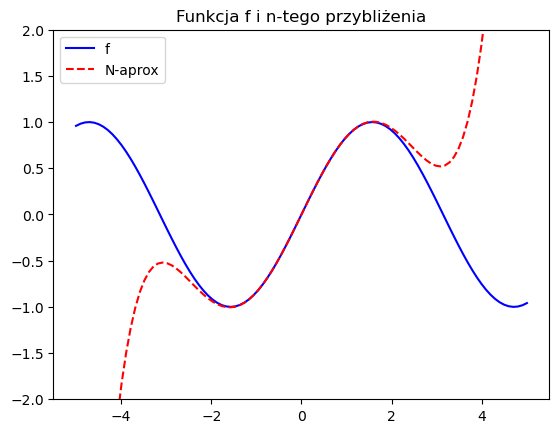

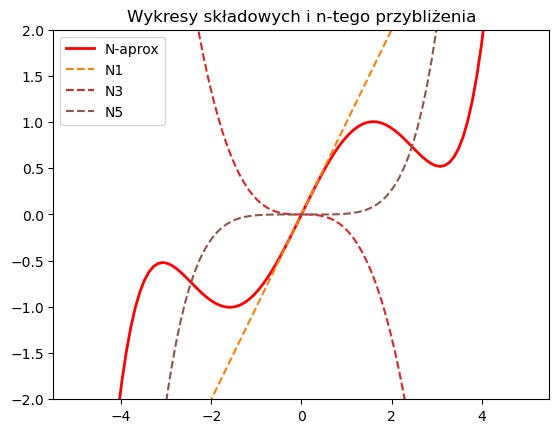

In [23]:
skladowe, n_aprox = taylor1(sin(x), 6)
display(skladowe)
display(n_aprox)

### Funkcja do szeregu Taylora nr 2


In [24]:
def taylor2(f, n1, n2, x0=0):
    # W1: wyliczenie składowych i n-tych przybliżeń
    skladowe = []
    for ni in range(n2 + 1):
        skladowe.append(f.diff(x, ni).subs(x, x0) / factorial(ni) * (x - x0) ** ni)

    przyblizenia = []
    for ni in range(n1, n2 + 1):
        przyblizenia.append(sum(skladowe[:ni]))

    # W2: narysowanie wykresów n-tych przybliżeń
    x_vals = np.linspace(x0 - 5, x0 + 5, 100)
    f_vals = [f.subs(x, val) for val in x_vals]
    fmax, fmin = int(max(f_vals)) + 2, int(min(f_vals)) - 2

    plt.plot(x_vals, f_vals, label="f", color="blue")
    for i, func in enumerate(przyblizenia):
        if func == 0:
            continue
        func_vals = [func.subs(x, val) for val in x_vals]
        plt.plot(x_vals, func_vals, label=f"N{i+n1}", color=f"C{i}", linestyle="dashed")

    plt.ylim(fmin, fmax)
    plt.title("Wykresy funkcji f i n-tych przybliżeń")
    plt.legend()

    plt.show()

    return przyblizenia

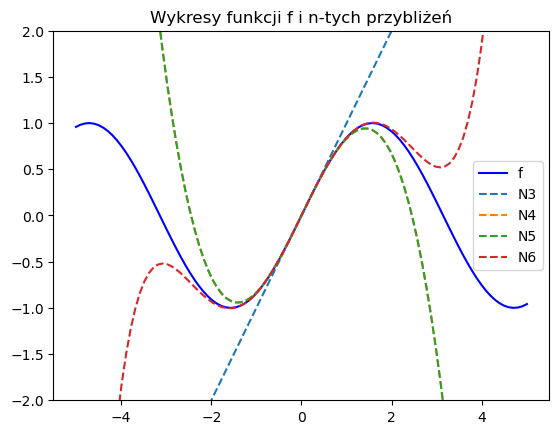

In [25]:
taylor2(sin(x), 3, 6)